# Analyse Results for Transfer Learning tests
- Australian data
- Ensemble size is 20
- 20 Ensembles
- Compare full transfer and frozen layers with no transfer learning

## Imports

In [1]:
import glob
import os
import pandas as pd

import scipy.stats as st

import matplotlib.pyplot as plt

import initialise
import common
from analysis_utils import calc_statistics, sort_file_list

## Directories and other settings
- Update the model directories as required

In [2]:
models_dir = r'G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Sourcerer TargetMax'

model_dirs = [
    os.path.join(models_dir, 'australia_sourcerer_0'),
    os.path.join(models_dir, 'australia_sourcerer_100'),
    os.path.join(models_dir, 'australia_sourcerer_200'),
    os.path.join(models_dir, 'australia_sourcerer_400'),
    os.path.join(models_dir, 'australia_sourcerer_800'),
    os.path.join(models_dir, 'australia_sourcerer_1600'),
    os.path.join(models_dir, 'australia_sourcerer_3200'),
    os.path.join(models_dir, 'australia_sourcerer_6400'),
    os.path.join(models_dir, 'australia_sourcerer_12800'),
    os.path.join(models_dir, 'australia_sourcerer_25600'),
    os.path.join(models_dir, 'australia_sourcerer_38400'),
    os.path.join(models_dir, 'australia_sourcerer_51200'),
    os.path.join(models_dir, 'australia_sourcerer_76800')
]

output_dir = os.path.join(common.DATA_DIR, 'Results', 'Sourcerer TargetMax')
figure_dir = common.FIGURES_DIR
precision = 4       # floating point precision for saved predictions
test_names = [0, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 38400, 51200, 76800]

In [3]:
def get_stats(model_dir, epoch=''):
    test_stats = []
    test_dirs = sort_file_list(glob.glob(os.path.join(model_dir, f'test*')), 'test')
    for num, test_dir in enumerate(test_dirs):
        stats_ = pd.read_csv(os.path.join(test_dir, epoch, 'ensemble_stats.csv'), index_col=0)
        test_stats.append(stats_)
    return pd.concat(test_stats, ignore_index=True)

In [4]:
def get_preds(model_dir, epoch=''):
    test_preds = []
    test_dirs = sort_file_list(glob.glob(os.path.join(model_dir, f'test*')), 'test')
    for num, test_dir in enumerate(test_dirs):
        preds_ = pd.read_csv(os.path.join(test_dir, epoch, 'ensemble_predicts.csv'), index_col=0)
        test_preds.append(preds_)
    return pd.concat([test_preds[0].y] + [t.base for t in test_preds],
                     axis=1,
                     keys=['y']+[f'run_{i}' for i in range(len(test_preds))]).round(precision)

In [5]:
# stats = []
# for idx, model_dir in enumerate(model_dirs):
#     file_name = test_names[idx]
#     stats.append(get_stats(model_dir))
#     stats_file = os.path.join(output_dir, f'{test_names[idx]}_stats.csv')
#     stats[idx].to_csv(stats_file)
#     print(f"Stats file name: {stats_file}")
#     preds = get_preds(model_dir)
#     preds_file = os.path.join(output_dir, f'{test_names[idx]}_predicts.csv')
#     preds.to_csv(preds_file)
#     print(f"Preds file name: {preds_file}")


Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\0_stats.csv
Preds file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\0_predicts.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\100_stats.csv
Preds file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\100_predicts.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\200_stats.csv
Preds file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\200_predicts.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\400_stats.csv
Preds file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\400_predicts.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation

In [3]:
stats = []
for idx, model_dir in enumerate(model_dirs):
    file_name = test_names[idx]
    stats_file = os.path.join(output_dir, f'{test_names[idx]}_stats.csv')
    stats.append(pd.read_csv(stats_file, index_col=0))
    print(f"Stats file name: {stats_file}")

Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\0_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\100_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\200_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\400_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\800_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\1600_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\3200_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Results\Sourcerer TargetMax\6400_stats.csv
Stats file name: G:\My Drive\Postdoc\LFMC Project\Data\Domain_adaptation\Result

In [4]:
# create 95% confidence interval
ci_list = []
for s in stats:
    mean = s.RMSE.mean()
    ci = st.t.interval(alpha=0.95, 
              df=len(s.RMSE)-1, 
              loc=mean,  
              scale=s.RMSE.sem())
    ci_list.append(ci)
std_devs = pd.DataFrame(ci_list, index=test_names, columns=['lower', 'upper'])

In [5]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

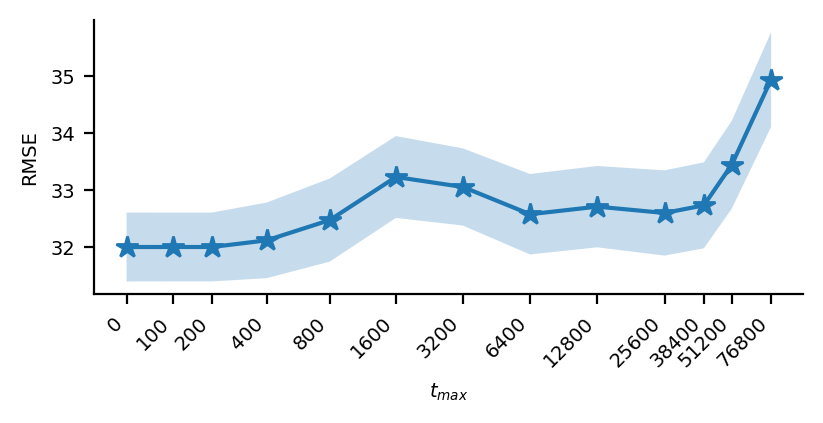

In [7]:
fig1, axes = plt.subplots(nrows=1, ncols=1, figsize=(4.0, 2.0), dpi=200, layout='constrained')

axes = pd.DataFrame([s.mean() for s in stats], index=test_names).RMSE.plot(marker='*', markersize=8)
axes.set_xscale("asinh", linear_width=200)
#axes.set_xticks([0, 100, 1000, 10000, 100000], [0, 100, 1000, 10000, 100000])
axes.set_xticks(test_names, test_names, rotation=45, ha='right')
axes.set_xlabel("$t_{max}$")
axes.set_ylabel("RMSE")
axes.minorticks_off()
#axes.set_title("Australian Sourcerer Results\n$t_{max}$ setting versus RMSE")
plt.fill_between(std_devs.index, std_devs.lower, std_devs.upper, alpha=0.25)
for axis in ['top', 'right']:
    axes.spines[axis].set_visible(False)
    
fig1.savefig(os.path.join(figure_dir, 'Sourcerer TargetMax results.jpeg'),
             format="jpeg", bbox_inches='tight', pad_inches=0.05, dpi=500)

In [10]:
results = pd.concat(stats, keys=test_names)[['RMSE', 'R2']]
results.groupby(level=0).mean().round(2)

,RMSE,R2
0,32.00,0.58
100,32.00,0.58
200,32.00,0.58
400,32.12,0.58
800,32.47,0.57
1600,33.23,0.55
3200,33.05,0.55
6400,32.58,0.56
12800,32.71,0.56
25600,32.60,0.56


In [49]:
import seaborn as sns

[Text(0, 0, '0'),
 Text(1, 0, '100'),
 Text(2, 0, '200'),
 Text(3, 0, '400'),
 Text(4, 0, '800'),
 Text(5, 0, '1600'),
 Text(6, 0, '3200'),
 Text(7, 0, '6400'),
 Text(8, 0, '12800'),
 Text(9, 0, '25600'),
 Text(10, 0, '38400'),
 Text(11, 0, '51200'),
 Text(12, 0, '76800')]

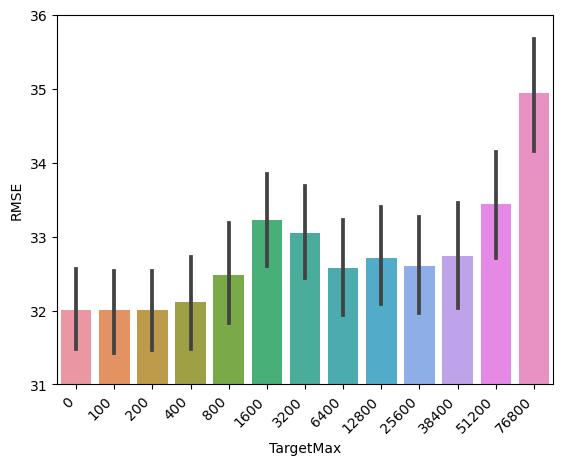

In [67]:
ax = sns.barplot(x="level_0", y="RMSE", data=results.reset_index())
ax.set_ylim(31, 36)
ax.set_xlabel('TargetMax')
ax.set_xticklabels(test_names, rotation=45, ha='right')